## Airline Case Study

For this case study, the tables have been stored in separate csv files as opposed to a single one. 

Let's load the libraries.

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

### PART A

#### Loading the 'Operations' table and checking its info

In [2]:
operations = pd.read_csv('Operations.csv')
operations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Aircraft_Name  26 non-null     object
 1   Aircraft_Type  26 non-null     object
 2   Jan-14         26 non-null     int64 
 3   Feb-14         26 non-null     int64 
 4   Mar-14         26 non-null     int64 
 5   Apr-14         26 non-null     int64 
 6   May-14         26 non-null     int64 
 7   Jun-14         26 non-null     int64 
 8   Jul-14         26 non-null     int64 
 9   Aug-14         26 non-null     int64 
 10  Sep-14         26 non-null     int64 
 11  Oct-14         26 non-null     int64 
 12  Nov-14         26 non-null     int64 
 13  Dec-14         26 non-null     int64 
dtypes: int64(12), object(2)
memory usage: 3.0+ KB


In [3]:
#Checking the head of the table
operations.head()

,Aircraft_Name,Aircraft_Type,Jan-14,Feb-14,Mar-14,Apr-14,May-14,Jun-14,Jul-14,Aug-14,Sep-14,Oct-14,Nov-14,Dec-14
0,A,A320,250,251,248,253,243,245,248,246,256,256,251,252
1,B,A330,300,301,298,303,293,295,298,296,306,306,301,302
2,C,B737,245,246,243,248,238,240,243,241,251,251,246,247
3,D,B747,310,311,308,313,303,305,308,306,316,316,311,312
4,E,Q400,200,201,198,203,193,195,198,196,206,206,201,202


#### Summing up the hours for all the aircrafts

In [4]:
operations['Total_Hours'] = operations.drop(['Aircraft_Type', 'Aircraft_Name'], axis = 1).sum(axis=1)

In [5]:
operations.head()

,Aircraft_Name,Aircraft_Type,Jan-14,Feb-14,Mar-14,Apr-14,May-14,Jun-14,Jul-14,Aug-14,Sep-14,Oct-14,Nov-14,Dec-14,Total_Hours
0,A,A320,250,251,248,253,243,245,248,246,256,256,251,252,2999
1,B,A330,300,301,298,303,293,295,298,296,306,306,301,302,3599
2,C,B737,245,246,243,248,238,240,243,241,251,251,246,247,2939
3,D,B747,310,311,308,313,303,305,308,306,316,316,311,312,3719
4,E,Q400,200,201,198,203,193,195,198,196,206,206,201,202,2399


#### Dropping the unrequired columns

In [6]:
operations = operations[['Aircraft_Name', 'Aircraft_Type', 'Total_Hours']]

operations.head()

,Aircraft_Name,Aircraft_Type,Total_Hours
0,A,A320,2999
1,B,A330,3599
2,C,B737,2939
3,D,B747,3719
4,E,Q400,2399


#### Loading the 'AC Characteristics' table

In [7]:
char_data = pd.read_csv('AC_characteristics.csv')
char_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Aircraft_Type          6 non-null      object
 1   Range_in_Km            6 non-null      object
 2   Avg_speed_in_Kph       6 non-null      int64 
 3   No_of_seats            6 non-null      int64 
 4   Costs_per_flight_hour  6 non-null      object
dtypes: int64(2), object(3)
memory usage: 368.0+ bytes


In [8]:
char_data.head(3)

,Aircraft_Type,Range_in_Km,Avg_speed_in_Kph,No_of_seats,Costs_per_flight_hour
0,A320,"5,000",800,150,"5,000"
1,A330,"8,000",900,250,"7,500"
2,B737,"5,000",800,150,"5,100"


#### Modifying the 'Char_data' dataframe

We notice that the columns _Range_in_Km_ and _Costs_per_flight_hour_ are of the datatype _Object_ as opposed to _int_. This will create problems later on when we will have to do mathematical operations on them. Hence we need to fix this.

In [9]:
# Make a list of the columns
collist = ['Range_in_Km','Costs_per_flight_hour']

# A for loop to replace all the commas from the values
for col in collist:    
    char_data[col] = char_data[col].str.replace(',','')


# Making a dictionary which will be passed to the 'astype' method to change the datatype
convert_dict = {}

for col in collist:
    convert_dict[col] = int
    
char_data = char_data.astype(convert_dict)

Now let's check the info again.

In [10]:
char_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Aircraft_Type          6 non-null      object
 1   Range_in_Km            6 non-null      int32 
 2   Avg_speed_in_Kph       6 non-null      int64 
 3   No_of_seats            6 non-null      int64 
 4   Costs_per_flight_hour  6 non-null      int32 
dtypes: int32(2), int64(2), object(1)
memory usage: 320.0+ bytes


---

#### Finding the total flying cost for all the different aircrafts

By calling the 'value_counts()' method on the 'Aircraft_Type' column of the operatons dataframe, we determine the no. of times the distinct aircraft type appear in the column.

In [11]:
operations['Aircraft_Type'].value_counts()

A330     6
A320     5
B737     4
Q400     4
ATR72    4
B747     3
Name: Aircraft_Type, dtype: int64

Since we want the total no. of hours flown by each aircraft type and not each distict aircraft, we have to use the 'groupby' method on this dataframe. This method will return a generator which slices the dataframe into different dataframes, for each aircraft type. 

In [12]:
g = operations.groupby('Aircraft_Type')

In [13]:
# Printing each dataframe stored in the generator
for ac,ac_df in g:
    print(ac)
    print('\n')
    print(ac_df)
    print('\n')

A320


   Aircraft_Name Aircraft_Type  Total_Hours
0             A           A320         2999
11             L          A320         2939
14             O          A320         2999
15             P          A320         2939
23             X          A320         2999


A330


   Aircraft_Name Aircraft_Type  Total_Hours
1              B          A330         3599
9              J          A330         3719
12             M          A330         3599
18             S          A330         3719
19             T          A330         3599
24             Y          A330         3599


ATR72


   Aircraft_Name Aircraft_Type  Total_Hours
5              F         ATR72         2339
8             I          ATR72         2399
17             R         ATR72         2399
22             W         ATR72         2399


B737


   Aircraft_Name Aircraft_Type  Total_Hours
2              C          B737         2939
10             K          B737         2999
13             N          B737         29

In [14]:
# Finally we will use the sum() method on this groupby generator 
# to find the total no of hours flown by each aircraft type

ac_tt_hrs = g.sum()
ac_tt_hrs

,Total_Hours
Aircraft_Type,
A320,14875
A330,21834
ATR72,9536
B737,11816
B747,11037
Q400,9476



#### Joining the above dataframe with 'char_data' on the column 'Aircraft_Type' to create the 'aircraft_info_df' dataframe

In [15]:
aircraft_info_df = char_data.join(ac_tt_hrs, on='Aircraft_Type')
aircraft_info_df

,Aircraft_Type,Range_in_Km,Avg_speed_in_Kph,No_of_seats,Costs_per_flight_hour,Total_Hours
0,A320,5000,800,150,5000,14875
1,A330,8000,900,250,7500,21834
2,B737,5000,800,150,5100,11816
3,B747,10000,900,350,12000,11037
4,Q400,1500,750,90,3500,9476
5,ATR72,1000,650,75,2750,9536


Let's rename the column **Costs_per_flight_hour** to **Cost/flight_hr** for simplicity

In [16]:
aircraft_info_df.rename(columns={'Costs_per_flight_hour':'Cost/flight_hr'}, inplace=True)
aircraft_info_df

,Aircraft_Type,Range_in_Km,Avg_speed_in_Kph,No_of_seats,Cost/flight_hr,Total_Hours
0,A320,5000,800,150,5000,14875
1,A330,8000,900,250,7500,21834
2,B737,5000,800,150,5100,11816
3,B747,10000,900,350,12000,11037
4,Q400,1500,750,90,3500,9476
5,ATR72,1000,650,75,2750,9536


#### Now, we will multiply the _Cost/flight_hr_ and _Hours_Flown_ columns to generate a new column _Total_cost_ indicating the total cost of flying each aircraft type for the year

In [17]:
aircraft_info_df['Total_cost'] = aircraft_info_df['Cost/flight_hr'] * aircraft_info_df['Total_Hours']

In [18]:
aircraft_info_df[['Aircraft_Type','Total_cost']]

,Aircraft_Type,Total_cost
0,A320,74375000
1,A330,163755000
2,B737,60261600
3,B747,132444000
4,Q400,33166000
5,ATR72,26224000


#### Multiplying the 'Hours_Flown' and 'Avg_speed_in_Kph' columns to calculate the total distance flown by each aircraft

In [19]:
aircraft_info_df['Distance_flown'] = aircraft_info_df['Total_Hours'] * aircraft_info_df['Avg_speed_in_Kph']

aircraft_info_df[['Aircraft_Type','No_of_seats','Distance_flown','Total_cost']]

,Aircraft_Type,No_of_seats,Distance_flown,Total_cost
0,A320,150,11900000,74375000
1,A330,250,19650600,163755000
2,B737,150,9452800,60261600
3,B747,350,9933300,132444000
4,Q400,90,7107000,33166000
5,ATR72,75,6198400,26224000


#### Calculating the 'Cost/seat/km' metric by using the expression:

Total_cost / (Distance_flown * No_of_seats)

In [20]:
aircraft_info_df['Cost/seat/km'] = aircraft_info_df['Total_cost'] / (aircraft_info_df['Distance_flown'] * aircraft_info_df['No_of_seats'])

aircraft_info_df[['Aircraft_Type', 'Cost/seat/km']]

,Aircraft_Type,Cost/seat/km
0,A320,0.041667
1,A330,0.033333
2,B737,0.042500
3,B747,0.038095
4,Q400,0.051852
5,ATR72,0.056410


#### Finding the cheapest aircraft in terms of 'Cost/seat/km'

In [21]:
cheapest_AC = aircraft_info_df[aircraft_info_df['Cost/seat/km'] == aircraft_info_df['Cost/seat/km'].min()]['Aircraft_Type']

In [22]:
# Since the 'cheapest_AC' variable is of the type 'Series' 
# we will use the below method to print the name of the cheapest aircraft

cheapest_AC[cheapest_AC.index[0]]

'A330'

---
### PART B

This part of the case study needs us to load the 'City pairs' table as 'route_df' dataframe

In [23]:
route_df = pd.read_csv('City_pairs.csv')
route_df

,Origin,Desitnation,PD,Distance_km
0,AA,BB,420,"3,000"
1,BB,CC,450,"6,500"
2,CC,AA,300,400
3,AA,DD,300,"1,000"


Let's make the dataframe for interpretable by calling each rows as differnt routes.

We'll add a new column indicating the route no.

In [24]:
route_df.insert(0, 'route_no', np.array([1,2,3,4]))
route_df

,route_no,Origin,Desitnation,PD,Distance_km
0,1,AA,BB,420,"3,000"
1,2,BB,CC,450,"6,500"
2,3,CC,AA,300,400
3,4,AA,DD,300,"1,000"


In [25]:
# Checking the info of the dataframe

route_df.info()

# Note: The 'PD' column corresponds to the daily passenger demand

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   route_no     4 non-null      int32 
 1   Origin       4 non-null      object
 2   Desitnation  4 non-null      object
 3   PD           4 non-null      int64 
 4   Distance_km  4 non-null      object
dtypes: int32(1), int64(1), object(3)
memory usage: 272.0+ bytes


#### We encounter the same problem we came across with the 'char_data' dataframe. 

#### So, we'll fix the data type of the 'Distance_km' column as we did before.

In [26]:
route_df['Distance_km'] = route_df['Distance_km'].str.replace(',','')

route_df = route_df.astype({'Distance_km': int})

In [27]:
# selecting the 'Aircraft_Type','Range_in_Km','No_of_seats' and 'Cost/seat/km' columns
# from the 'aircraft_info_df' dataframe into a new dataframe 'req_df' 

req_df = aircraft_info_df[['Aircraft_Type','Range_in_Km','No_of_seats','Cost/seat/km']]
req_df

,Aircraft_Type,Range_in_Km,No_of_seats,Cost/seat/km
0,A320,5000,150,0.041667
1,A330,8000,250,0.033333
2,B737,5000,150,0.042500
3,B747,10000,350,0.038095
4,Q400,1500,90,0.051852
5,ATR72,1000,75,0.056410


---
Let us now proceed with searching for the right aircraft for the each route.

In [28]:
# for route no 1, let's first filter out the 'req_df' dataframe to 
# find out the aircrafts having range greater than the length of the route 
# i.e req_df['Range_in_Km'] > 3000

route1_df = req_df[req_df['Range_in_Km'] > 3000]

route1_df

,Aircraft_Type,Range_in_Km,No_of_seats,Cost/seat/km
0,A320,5000,150,0.041667
1,A330,8000,250,0.033333
2,B737,5000,150,0.042500
3,B747,10000,350,0.038095


Checking the daily passenger demand for this route

In [29]:
route1_pd = route_df[route_df['route_no'] == 1]['PD']
route1_pd[route1_pd.index[0]]

420

Since the passenger demand exceeds the no. of seats in any aircraft, we will need to find the no. of aircrafts (or no. of daily trips for each aircraft) required for this route. 

To do this we will need the folling formula:

no of aircrafts = { 'PD // (no of seats)' if PD % (no of seats) = 0
                   
                    else,
                   
                    '(PD//(no of seats)) + 1' }
                   
where, '//' and '%' are the quotient and the modulo operators respectively and 
'PD' is the daily passenger demand.

In [30]:
# Calculating the no of aircrafts required for each aircraft type 
# by applying the above formula to the 'No_of_seats' column 

route1_df.loc[:,'No_Aircrafts'] = route1_df['No_of_seats'].apply(lambda x: 420//x if 420%x == 0 else (420//x)+1)

In [31]:
# Since we know the 'Cost/seat/km' metric, we need to calculate the total no of seats by aircraft type

route1_df.loc[:,'Total_seats'] = route1_df['No_of_seats'] * route1_df['No_Aircrafts']

Let's calculate the daily cost of flying each aircraft on this route

In [32]:
# Multiplying the columns 'Total_seats'

route1_df.loc[:,'Daily_flying_cost'] = route1_df['Total_seats'] * route1_df['Cost/seat/km'] * 3000

In [33]:
route1_df

,Aircraft_Type,Range_in_Km,No_of_seats,Cost/seat/km,No_Aircrafts,Total_seats,Daily_flying_cost
0,A320,5000,150,0.041667,3,450,56250.0
1,A330,8000,250,0.033333,2,500,50000.0
2,B737,5000,150,0.042500,3,450,57375.0
3,B747,10000,350,0.038095,2,700,80000.0


The optimum aircraft for this route will be the one with least daily flying cost.

In [34]:
route1_AC = route1_df[route1_df['Daily_flying_cost'] == route1_df['Daily_flying_cost'].min()]['Aircraft_Type']
route1_AC[route1_AC.index[0]]

'A330'

### Automizing the process with a function

We will have to repeat the same process for all the other routes as well. Doing this manually each time would not be feasable. Hence, we will use for loops and string comprehension for this. 

The function will take in the _route_df_ dataframe as input, do the above operations for all the routes and return the following objects:

- **fleet**: DataFrame containing the required fleet information like aircraft type, no of aircrafts and daily flying cost for that route
- **RouteDF**: A Comprehensive DataFrame consisting of all the eligible aircrafts for each route.

In [35]:
def optimize_fleet(data=route_df):
    
    # generating the list of filtered dataframes
    
    route_AClist = [req_df[req_df['Range_in_Km'] >= dist] for dist in data['Distance_km']]
    
    # generating the list of 'no of aircrafts' arrays
    
    no_AC_list = [route_AClist[i]['No_of_seats'].apply(lambda x: (data['PD'][i])//x if (data['PD'][i])%x == 0 
                                                   else ((data['PD'][i])//x)+1) for i in range(len(data))]
    
    # generating the list of 'total seats' arrays
    
    tt_seat_list = [no_AC_list[i] * route_AClist[i]['No_of_seats'] for i in range(4)]
    
    # generating the list of 'daily flying cost' arrays
    
    route_cost_list = [tt_seat_list[i] * route_AClist[i]['Cost/seat/km']
                   * data['Distance_km'][i] for i in range(len(data))]
    
    # initializing the list of optimum aircrafts 
    opt_AC_list = []
    
    # adding the columns to the respective dataframes
    for i in range(len(data)):
        
        route_AClist[i].loc[:,'No_Aircrafts'] = no_AC_list[i]
        route_AClist[i].loc[:,'Total_seats'] = tt_seat_list[i]
        route_AClist[i].loc[:,'Daily_flying_cost'] = route_cost_list[i]
        
        # adding the route no column to each dataframe
        route_AClist[i].insert(0, 'Route No.', (i+1)*np.ones(len(route_AClist[i])))
        
        # updating the optimum aircraft variable
        opt_AC = route_AClist[i][route_AClist[i]['Daily_flying_cost'] == 
                                                  route_AClist[i]['Daily_flying_cost'].min()]
        
        # appending the aircraft to the list
        opt_AC_list.append(opt_AC)
    
    # generating the fleet DF
    fleet = pd.concat([opt for opt in opt_AC_list], axis=0)
    fleet = fleet[["Route No.", "Aircraft_Type", "No_Aircrafts", "Daily_flying_cost"]]
    fleet["Daily_flying_cost"] = fleet["Daily_flying_cost"].apply(lambda x: round(x, 2))
    
    # generating the RouteDF
    RouteDF = pd.concat([df for df in route_AClist], axis = 0)
    RouteDF["Daily_flying_cost"] = RouteDF["Daily_flying_cost"].apply(lambda x: round(x, 2))
    
    return fleet, RouteDF

Let's check it out!

In [36]:
fleet, RouteDF = optimize_fleet()
fleet

,Route No.,Aircraft_Type,No_Aircrafts,Daily_flying_cost
1,1.0,A330,2,50000.00
1,2.0,A330,2,108333.33
0,3.0,A320,2,5000.00
0,4.0,A320,2,12500.00


In [37]:
RouteDF

,Route No.,Aircraft_Type,Range_in_Km,No_of_seats,Cost/seat/km,No_Aircrafts,Total_seats,Daily_flying_cost
0,1.0,A320,5000,150,0.041667,3,450,56250.00
1,1.0,A330,8000,250,0.033333,2,500,50000.00
2,1.0,B737,5000,150,0.042500,3,450,57375.00
3,1.0,B747,10000,350,0.038095,2,700,80000.00
1,2.0,A330,8000,250,0.033333,2,500,108333.33
3,2.0,B747,10000,350,0.038095,2,700,173333.33
0,3.0,A320,5000,150,0.041667,2,300,5000.00
1,3.0,A330,8000,250,0.033333,2,500,6666.67
2,3.0,B737,5000,150,0.042500,2,300,5100.00
3,3.0,B747,10000,350,0.038095,1,350,5333.33


In [38]:
aircraft_info_df.to_csv('Aircraft_Info.csv', index=False)

aircraft_info_df

,Aircraft_Type,Range_in_Km,Avg_speed_in_Kph,No_of_seats,Cost/flight_hr,Total_Hours,Total_cost,Distance_flown,Cost/seat/km
0,A320,5000,800,150,5000,14875,74375000,11900000,0.041667
1,A330,8000,900,250,7500,21834,163755000,19650600,0.033333
2,B737,5000,800,150,5100,11816,60261600,9452800,0.042500
3,B747,10000,900,350,12000,11037,132444000,9933300,0.038095
4,Q400,1500,750,90,3500,9476,33166000,7107000,0.051852
5,ATR72,1000,650,75,2750,9536,26224000,6198400,0.056410


#### So the airline should use a fleet of 2 A330s and 2 A320s

Now, using the RoutesDF dataframe, we can make a interactive dashboard. The dataframe has already been exported to _Routes.csv_

In [40]:
RouteDF.to_csv('Routes.csv', index = False)

Link to the Tableau Dashboard: 

https://public.tableau.com/app/profile/prakhar.gupta4871/viz/AirlineCaseStudy/MyDash?publish=yes

---
# REPORT

## Visualizing the data for Part A

Let's import the libraries

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [42]:
# Setting the background style

plt.style.use('seaborn-darkgrid')

Since the 'Distance flown', 'Cost per Seat per Km' and 'Total Cost' columns are not upto scale, let's modify them.

In [43]:
# Converting distance from 'Km' to '1000 Km' scale

aircraft_info_df.loc[:,'Distance_1000_km'] = aircraft_info_df['Distance_flown'] / 1000

In [44]:
# Converting 'Cost/seat/km' from USD to cents

aircraft_info_df.loc[:,'Cost/seat/km_cents'] = aircraft_info_df['Cost/seat/km'] * 100

In [45]:
# Converting Total costs from USD scale to '1000 USD' scale

aircraft_info_df.loc[:,'Total_cost_1000_USD'] = aircraft_info_df['Total_cost'] / 1000

### Visualizing the Range Variable by Aircraft Type

Text(0.5, 1.0, 'Range by Aircraft Type')

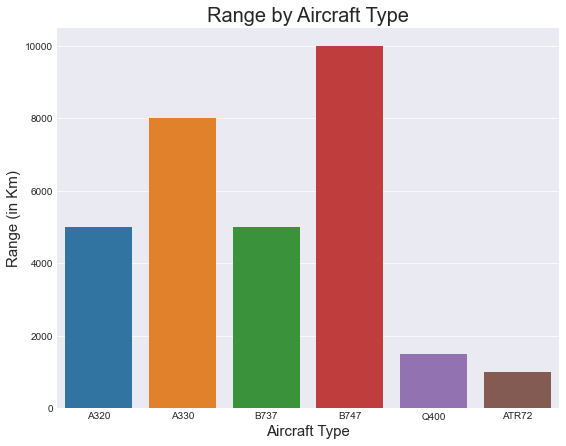

In [46]:
plt.rcParams['figure.figsize'] = 9,7
sns.barplot(x='Aircraft_Type', y='Range_in_Km', data=aircraft_info_df)
plt.xlabel('Aircraft Type', fontsize=15)
plt.ylabel('Range (in Km)', fontsize=15)
plt.title('Range by Aircraft Type', fontsize=20)

### Visualizing the 'Distance Flown' with respect to 'Hours Flown' 

These parameters are the indicators of the popularity of an aircraft type.

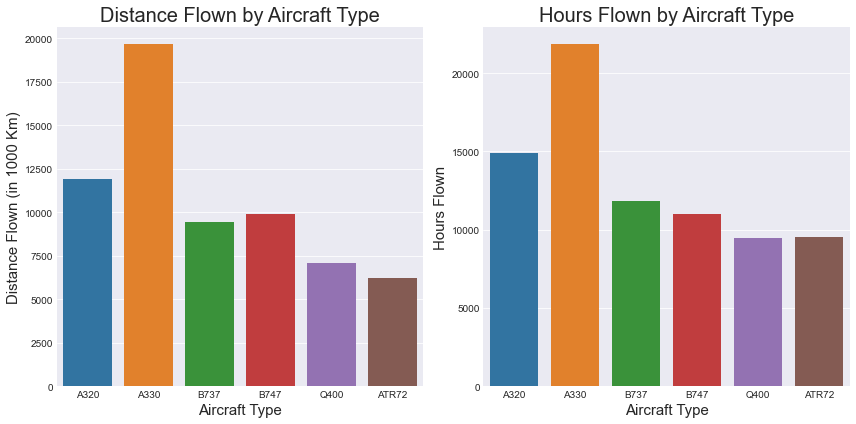

In [47]:
f, ax = plt.subplots(1, 2, figsize=(12,6), sharex=True)

# Distance Flown

p1 = sns.barplot(x='Aircraft_Type', y='Distance_1000_km', data=aircraft_info_df, ax=ax[0])
ax[0].set_xlabel('Aircraft Type', fontsize=15)
ax[0].set_ylabel('Distance Flown (in 1000 Km)', fontsize=15)
ax[0].set_title('Distance Flown by Aircraft Type', fontsize=20)

#Hours Flown

p2 = sns.barplot(x='Aircraft_Type', y='Total_Hours', data=aircraft_info_df, ax=ax[1])
ax[1].set_xlabel('Aircraft Type', fontsize=15)
ax[1].set_ylabel('Hours Flown', fontsize=15)
ax[1].set_title('Hours Flown by Aircraft Type', fontsize=20)

plt.tight_layout()
plt.show()

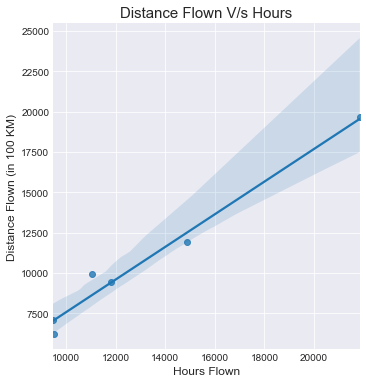

In [48]:
sns.lmplot(x='Total_Hours', y='Distance_1000_km', data=aircraft_info_df)
plt.xlabel('Hours Flown', fontsize=12)
plt.ylabel('Distance Flown (in 100 KM)', fontsize=12)
plt.title('Distance Flown V/s Hours', fontsize=15)

plt.show()

### Comparing 'Range' with 'Distance Flown' and 'Hours Flown' variables

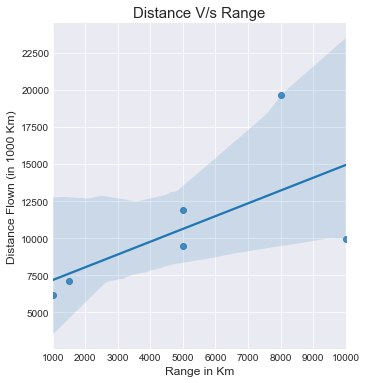

In [49]:
# Comparison with Distance Flown

sns.lmplot(x='Range_in_Km', y='Distance_1000_km', data=aircraft_info_df)
plt.xlabel('Range in Km', fontsize=12)
plt.ylabel('Distance Flown (in 1000 Km)', fontsize=12)
plt.title('Distance V/s Range', fontsize=15)

plt.show()

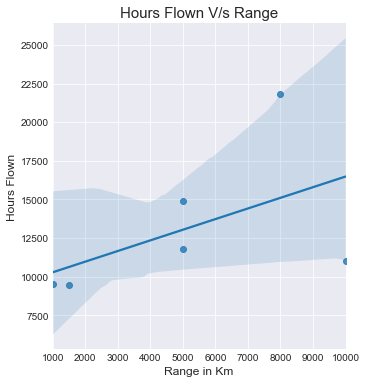

In [50]:
# Comparison with 'Hours Flown'

sns.lmplot(x='Range_in_Km', y='Total_Hours', data=aircraft_info_df)
plt.xlabel('Range in Km', fontsize=12)
plt.ylabel('Hours Flown', fontsize=12)
plt.title('Hours Flown V/s Range', fontsize=15)

plt.show()

The popularity of an aircraft generally increases with Range.

#### Now let's look at the 'Total Flying Cost' and the 'Cost / seat / km' variables 

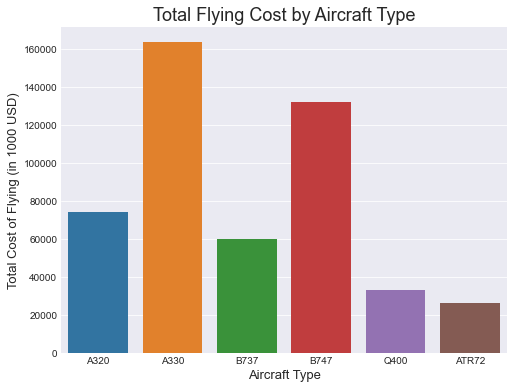

In [51]:
plt.rcParams['figure.figsize'] = 8,6
sns.barplot(x='Aircraft_Type', y='Total_cost_1000_USD', data=aircraft_info_df)
plt.xlabel('Aircraft Type', fontsize=13)
plt.ylabel('Total Cost of Flying (in 1000 USD)', fontsize=13)
plt.title('Total Flying Cost by Aircraft Type', fontsize=18)

plt.show()

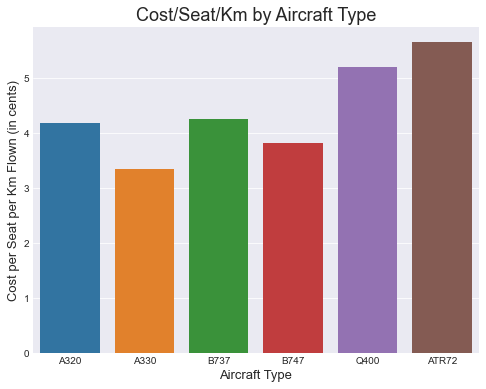

In [52]:
sns.barplot(x='Aircraft_Type', y='Cost/seat/km_cents', data=aircraft_info_df)
plt.xlabel('Aircraft Type', fontsize=13)
plt.ylabel('Cost per Seat per Km Flown (in cents)', fontsize=13)
plt.title('Cost/Seat/Km by Aircraft Type', fontsize=18)

plt.show()

#### Again, let's compare the 'Cost/seat/km' metric with the popularity indicator variables

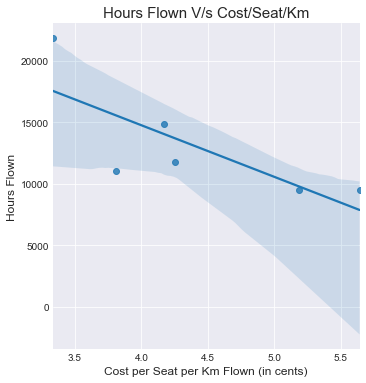

In [53]:
# With Hours Flown

sns.lmplot(x='Cost/seat/km_cents', y='Total_Hours', data=aircraft_info_df)
plt.xlabel('Cost per Seat per Km Flown (in cents)', fontsize=12)
plt.ylabel('Hours Flown', fontsize=12)
plt.title('Hours Flown V/s Cost/Seat/Km', fontsize=15)
plt.show()

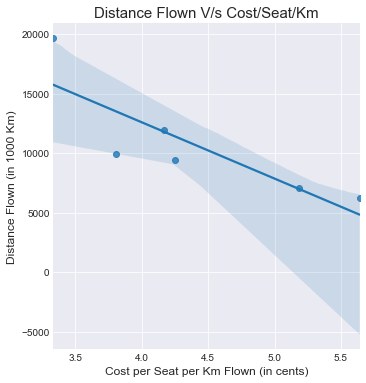

In [54]:
# With Distance /flown

sns.lmplot(x='Cost/seat/km_cents', y='Distance_1000_km', data=aircraft_info_df)
plt.xlabel('Cost per Seat per Km Flown (in cents)', fontsize=12)
plt.ylabel('Distance Flown (in 1000 Km)', fontsize=12)
plt.title('Distance Flown V/s Cost/Seat/Km', fontsize=15)
plt.show()

#### As this metric increases, the popularity decreases

Now let's look at the 'No of seats' variable.

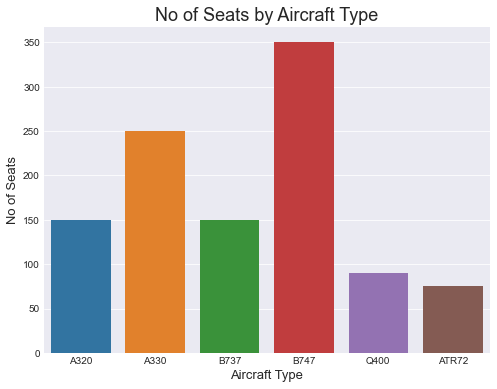

In [55]:
sns.barplot(x='Aircraft_Type', y='No_of_seats', data=aircraft_info_df)
plt.xlabel('Aircraft Type', fontsize=13)
plt.ylabel('No of Seats', fontsize=13)
plt.title('No of Seats by Aircraft Type', fontsize=18)

plt.show()

#### Doing the comparison

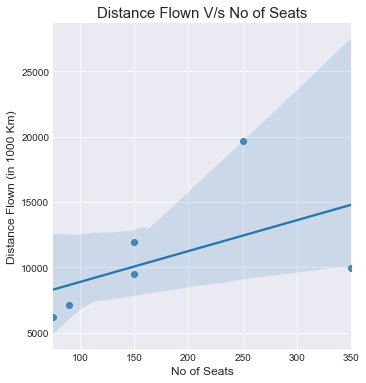

In [56]:
# With Distance Flown

sns.lmplot(x='No_of_seats', y='Distance_1000_km', data=aircraft_info_df)
plt.xlabel('No of Seats', fontsize=12)
plt.ylabel('Distance Flown (in 1000 Km)', fontsize=12)
plt.title('Distance Flown V/s No of Seats', fontsize=15)
plt.show()

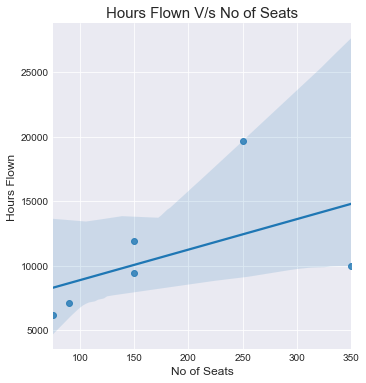

In [57]:
# With Hours Flown

sns.lmplot(x='No_of_seats', y='Distance_1000_km', data=aircraft_info_df)
plt.xlabel('No of Seats', fontsize=12)
plt.ylabel('Hours Flown', fontsize=12)
plt.title('Hours Flown V/s No of Seats', fontsize=15)
plt.show()

#### Populatity increased with the no of seats in an aircraft.

Hence, the perfect aircraft for a particular route must be a trade-off between low 'Cost/seat/km' and high 'Range' as well as high 'No of seats'.